In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('AirQuality.csv', sep=';')

Saving AirQuality.csv to AirQuality.csv


In [ ]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


## **Tahap Preprocessing**

In [ ]:
df = df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], errors='ignore')

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.')
        df[col] = df[col].astype(float)

In [ ]:
df = df.replace(-200, np.nan)
df = df.fillna(df.median())

In [ ]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9471 non-null   float64
 1   PT08.S1(CO)    9471 non-null   float64
 2   NMHC(GT)       9471 non-null   float64
 3   C6H6(GT)       9471 non-null   float64
 4   PT08.S2(NMHC)  9471 non-null   float64
 5   NOx(GT)        9471 non-null   float64
 6   PT08.S3(NOx)   9471 non-null   float64
 7   NO2(GT)        9471 non-null   float64
 8   PT08.S4(NO2)   9471 non-null   float64
 9   PT08.S5(O3)    9471 non-null   float64
 10  T              9471 non-null   float64
 11  RH             9471 non-null   float64
 12  AH             9471 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000
mean,2.085820,1097.966424,156.640693,9.987668,937.625172,234.514729,833.998839,112.332700,1456.605955,1019.870024,18.291585,49.252740,1.024003
std,1.315415,211.661265,66.657341,7.270307,260.065263,194.006563,250.307741,43.684741,337.321954,388.476425,8.606121,16.872511,0.393501
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,943.000000,150.000000,4.600000,744.000000,113.000000,667.000000,86.000000,1246.000000,744.500000,12.100000,36.700000,0.750100
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1218.000000,150.000000,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


**Standarisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


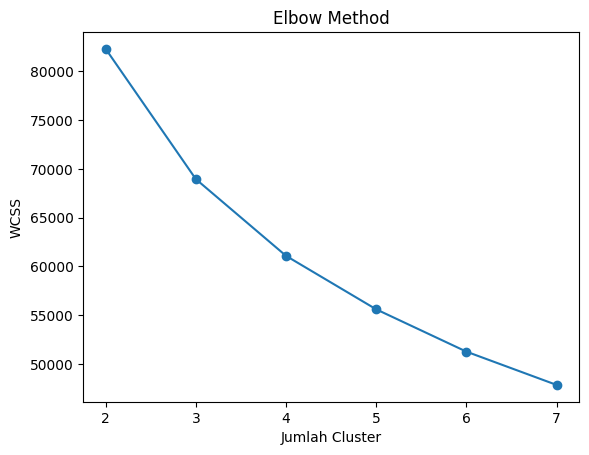

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 8), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.21633039189371606


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


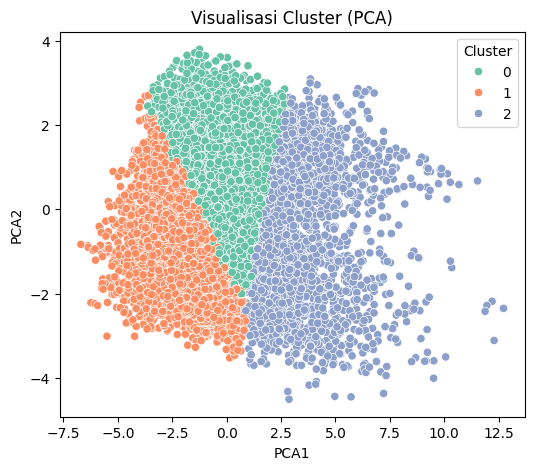

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Visualisasi Cluster (PCA)')
plt.show()


**Logistic Regression**

In [ ]:
X = df_scaled
y = df['Cluster']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

logreg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.99155672823219

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       815
           1       0.99      1.00      0.99       646
           2       1.00      0.98      0.99       434

    accuracy                           0.99      1895
   macro avg       0.99      0.99      0.99      1895
weighted avg       0.99      0.99      0.99      1895

Confusion Matrix:

[[808   6   1]
 [  1 645   0]
 [  8   0 426]]


In [ ]:
coef_df = pd.DataFrame(
    logreg.coef_,
    columns=X.columns,
    index=[f'Cluster {i}' for i in logreg.classes_]
)

coef_df


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Cluster 0,-0.656150,-0.455526,-0.201878,-0.984957,0.988060,-1.604640,-0.579687,-0.957731,1.324545,-0.549225,3.003499,-1.085475,2.116653
Cluster 1,-2.630101,-3.071089,-0.856010,-3.216363,-4.252237,-0.955073,3.641690,-1.734696,-3.821205,-3.219059,-3.242669,1.208985,-3.030674
Cluster 2,3.286251,3.526614,1.057888,4.201319,3.264177,2.559713,-3.062002,2.692427,2.496660,3.768283,0.239170,-0.123510,0.914021


In [ ]:
import joblib
import os

os.makedirs("model", exist_ok=True)
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(kmeans, "model/kmeans.pkl")
joblib.dump(logreg, "model/logreg.pkl")
joblib.dump(X.columns.tolist(), "model/features.pkl")

print("Semua model berhasil disimpan!")


Semua model berhasil disimpan!
